In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hashlib as hl

# STUDENT ID NUMBER: 2024-10379

# INSTRUCTIONS

1. Put your student ID number (no other identifying features).  
If collaborating, put collaborators' id numbers underneath (again, no identifying features).
1. Submit both a notebook and exported PDF of the notebook after restart-and-run-all.  
    1. Submitted notebook must run in reasonable time.
    1. Ensure the exported pdf is LaTex formatted. 
1. For the written section:
    1. Output should be listed in a separate, typeset PDF with your ID number.
    1. Question numbers are from *The Algorithm Design Manual*, 2nd edition by Steven Skiena.
    1. Incomplete solutions recieve no credit. 
1. For the coding section:
    1. Limit code answers to the designated spaces in functions (marked off by "###") and cells (marked by "### DO: *\<instructions\>*").  
       You may add extra cells to run subroutines (in order), but only marked cells will be graded. 
    1. Do not change the provided cells, or their order.  
       Any detected alterations will zero out that section. 
       
### Tips
- You are encouraged to work either alone or with your official partner, but not more.  
- For the coding section, test and sanity-check your work extensively.  
- For written questions on the coding exercises, if you really understand the solution, the answer should fit in 1-3 sentences.  

# Written [$2(3\times 5) + 5(2\times 4) = 70$ pts]

## Chapter 1
1. Skiena 1-1
1. Skiena 1-2
2. Skiena 1-8
3. Skiena 1-10
4. Skiena 1-11

## Chapter 2

1. Skiena 2-5
1. Skiena 2-13
1. Skiena 2-32
1. Skiena 2-42
1. Skiena 2-46

## Chapter 3

1. Skiena 3-5
1. Skiena 3-12
1. Skiena 3-18
1. Skiena 3-19
1. Skiena 3-29

## Ex. 1

1. Give the theoretical worst-case analysis for the time complexities of each strategy. 
1. Give the theoretical average-case analysis for the time complexities of each strategy. 
1. If you want to minimize average steps, what is the best strategy and why it it objectively optimal?  
Note: the best strategy may be one of the strategies given, or you may need to make your own.
1. How does the optimal strategy change if instead of saying higher or lower, each guess tells you if you are within $\pm N/k$ of the target?  
For simplicity, assume $k$ is an integer greater than 1.

## Ex. 2

1. Explain your choice of hashing function.  
1. In the book, the hashes are constructed to be pseudo-random, while Python dictionary hashes are not random, both for different reasons.  
Is randomness a necessary property of Rabin-Karp hashes?
1. The earliest implementations of Rabin-Karp used the Rabin fingerprint for hashing.  
What is this fingerprint, and what are its advantages?  
1. How would you modify your function to search multiple patterns? 

# Coding [$15 + 15 = 30$ pts]

## Ex. 1 - Guess The Number

Play the following game.

I am thinking of an integer between $1$ and $N$ inclusive. 

Guess what it is, and I will tell you if the true answer is higher or lower.  
Find the number in as few guesses as possible. 

Below I have left functions for three strategies:
1. Guess from lowest to highest ("linear")
2. Guess randomly, and reduce the guessing range if higher or lower ("random")
3. Guess the middle, and reduce the guessing range if higher or lower ("binary")

Fill in the code below. 

In [2]:
### DO: Fill in the code for the 3 guessing strategies. 

def std_in(N, x):
    x = int(x)
    N = int(N)
    if (x<1)|(x>N):
        raise Exception('Picking a number out of range')
    elif (N<1):
        raise Exception('Low range')

    return N, x

def guessingGame(N, x, guess): 
    N, x = std_in(N, x)
    guess = int(guess)
    
    if guess == x:
        #print("Correct")
        return 0
    elif guess < x:
        #print("Guess {} - Go higher".format(guess))
        return 1
    else:
        #print("Guess {} - Go lower".format(guess))
        return -1

def linGuess(N, x): 
    N, x = std_in(N, x)
    steps = 1

    ### YOUR CODE HERE ###
    
    while guessingGame(N, x, steps) != 0:
        steps += 1
    
    ### END ###
    return steps


def randGuess(N, x):
    N, x = std_in(N, x)
    steps = 1
    
    ### YOUR CODE HERE ###

    min, max = 1, N + 1
    while True:
        guess = np.random.randint(min, max)
        result = guessingGame(N, x, guess)
        if result == 0:
            break
        elif result == 1:
            min = guess + 1
        else:
            max = guess
        steps += 1
    
    ### END ###
    return steps


def binGuess(N, x):
    N, x = std_in(N, x)
    steps = 1
    
    ### YOUR CODE HERE ###

    min, max = 1, N
    while True:
        guess = min + (max - min) // 2
        result = guessingGame(N, x, guess)
        if result == 0:
            break
        elif result == 1:
            min = guess + 1
        else:
            max = guess - 1
        steps += 1
    
    ### END ###
    return steps

In [3]:
### DO: Demonstrate the 3 strategies find the number over a representative and convincincing set of N and x
test_cases = []
for i in range(2,15):
    for j in range(10):
        test_cases.append((2**i, np.random.randint(1,2**i)))

lin = [[],[]]
rand = [[],[]]
bin = [[],[]]

for N, x in test_cases:
    print(f"N={N}, x={x}")
    lin[0].append(N)
    lin[1].append(linGuess(N, x))
    rand[0].append(N)
    rand[1].append(randGuess(N, x))
    bin[0].append(N)
    bin[1].append(binGuess(N, x))



N=4, x=2
N=4, x=3
N=4, x=2
N=4, x=3
N=4, x=1
N=4, x=2
N=4, x=1
N=4, x=2
N=4, x=1
N=4, x=2
N=8, x=2
N=8, x=5
N=8, x=7
N=8, x=1
N=8, x=1
N=8, x=4
N=8, x=6
N=8, x=6
N=8, x=5
N=8, x=2
N=16, x=5
N=16, x=14
N=16, x=7
N=16, x=5
N=16, x=8
N=16, x=2
N=16, x=10
N=16, x=8
N=16, x=14
N=16, x=14
N=32, x=17
N=32, x=12
N=32, x=22
N=32, x=14
N=32, x=10
N=32, x=11
N=32, x=1
N=32, x=22
N=32, x=1
N=32, x=24
N=64, x=54
N=64, x=33
N=64, x=20
N=64, x=50
N=64, x=24
N=64, x=43
N=64, x=39
N=64, x=44
N=64, x=52
N=64, x=31
N=128, x=66
N=128, x=109
N=128, x=77
N=128, x=21
N=128, x=36
N=128, x=79
N=128, x=74
N=128, x=85
N=128, x=114
N=128, x=85
N=256, x=174
N=256, x=184
N=256, x=12
N=256, x=89
N=256, x=173
N=256, x=77
N=256, x=249
N=256, x=84
N=256, x=49
N=256, x=165
N=512, x=18
N=512, x=114
N=512, x=208
N=512, x=182
N=512, x=300
N=512, x=346
N=512, x=424
N=512, x=473
N=512, x=147
N=512, x=285
N=1024, x=418
N=1024, x=601
N=1024, x=679
N=1024, x=53
N=1024, x=502
N=1024, x=661
N=1024, x=818
N=1024, x=598
N=1024, x=7

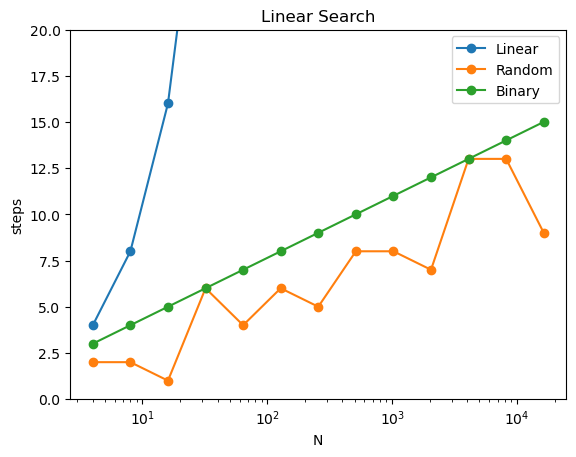

In [4]:
### DO: Find the worst case for each strategy and plot their performance in log(N) vs. steps. 
### Note: For the random strategy, you may copy the binary strategy's worst case.  
worst_cases = []
for i in range(2,15):
    worst_cases.append((2**i, 2**i))

lin_worst = [[],[]]
rand_worst = [[],[]]
bin_worst = [[],[]]

for N, x in worst_cases:
    lin_worst[0].append(N)
    lin_worst[1].append(linGuess(N, x))
    rand_worst[0].append(N)
    rand_worst[1].append(randGuess(N, x))
    bin_worst[0].append(N)
    bin_worst[1].append(binGuess(N, x))

plt.plot(lin_worst[0],lin_worst[1], marker='o', label="Linear")
plt.plot(rand_worst[0],rand_worst[1], marker='o', label="Random")
plt.plot(bin_worst[0],bin_worst[1], marker='o', label="Binary")
plt.legend()
plt.xscale("log")
plt.ylim(0,20)
plt.title("Worst Case Steps for log(N)")
plt.xlabel("N")
plt.ylabel("steps")
plt.title("Linear Search")
plt.show()

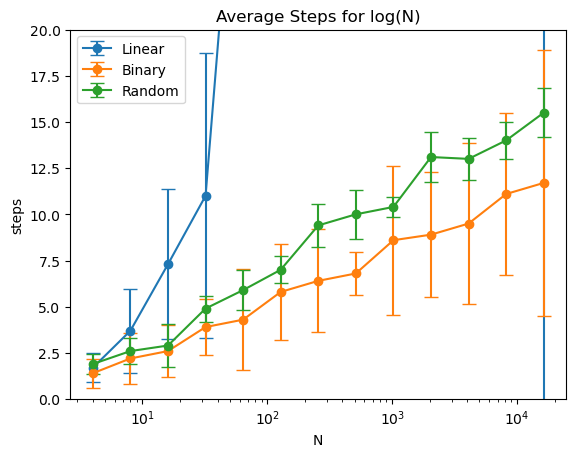

In [5]:
### DO: Plot the (empirical) average performance in log(N) vs. steps for all strategies. 
### Per log(N), plot the sample average with the sample stdev as error bars. 

n = [2**i for i in range(2, 15)]

lins = [lin[1][0+10*i:0+10*i+9] for i in range(13)]
rands = [rand[1][0+10*i:0+10*i+9] for i in range(13)]
bins = [bin[1][0+10*i:0+10*i+9] for i in range(13)]

avg_lin = [sum(lins[i])/10 for i in range(13)]
avg_rand = [sum(rands[i])/10 for i in range(13)]
avg_bin = [sum(bins[i])/10 for i in range(13)]

lin_stdev = []
rand_stdev = []
bin_stdev = []

for i in range(13):
    lin_mean = sum(lins[i]) / len(lins[i])
    lin_variance = sum((x - lin_mean) ** 2 for x in lins[i]) / (len(lins[i]) - 1)
    lin_stdev.append(lin_variance ** 0.5)

    rand_mean = sum(rands[i]) / len(rands[i])
    rand_variance = sum((x - rand_mean) ** 2 for x in rands[i]) / (len(rands[i]) - 1)
    rand_stdev.append(rand_variance ** 0.5)

    bin_mean = sum(bins[i]) / len(bins[i])
    bin_variance = sum((x - bin_mean) ** 2 for x in bins[i]) / (len(bins[i]) - 1)
    bin_stdev.append(bin_variance ** 0.5)

plt.errorbar(n, avg_lin, yerr=lin_stdev, label = "Linear", marker = "o", capsize=5)
plt.errorbar(n, avg_bin, yerr=rand_stdev, label = "Binary", marker = "o", capsize=5)
plt.errorbar(n, avg_rand, yerr=bin_stdev, label = "Random", marker = "o", capsize=5)
plt.xscale("log")
plt.title("Average Steps for log(N)")
plt.ylim(0,20)
plt.legend()
plt.xlabel("N")
plt.ylabel("steps")
plt.show()

# Ex. 2 - Rabin-Karp Algorithm

See the lecture notes on Rabin-Karp and string matching.   

In [6]:
### DO: Implement a Rabin-Karp string matcher. 
### You may use either hashlib or your own hashing function. 

def hash(s):
    hashVal = 0
    ### YOUR CODE HERE ###

    for i in range(len(s)):
        hashVal += s[i].encode('windows-1252')[0] * (256 ** (len(s) - i - 1))
    
    ### END ###
    return hashVal

def RK(s1, s2):
    ### YOUR CODE HERE ###

    patternHash = hash(s2)
    windowHash = hash(s1[0:len(s2)])
    matches = []
    if windowHash == patternHash:
        if s1[:len(s2)] == s2:
            matches.append(0)
    for i in range(len(s1) - len(s2)):
        windowHash = windowHash * 256 - hash(s1[i]) * 256 ** len(s2) + hash(s1[i + len(s2)])
        if windowHash == patternHash:
            if s1[i+1:i+1+len(s2)] == s2:
                matches.append(i+1)

    return matches
    
    ### END ###
 

In [15]:
### DO: Verify the algorithm works- you need to show it works over a reasonably large set of test cases, including any edge cases.  
### You can use native string methods as a stable reference of correctness.  
### Identifying a reasonable set of test cases is part of the assessment.  

def run_rk_tests():
    test_cases = [
        # (text, pattern, expected_indices)
        ("abcde", "bc", [1]),
        ("aaaaa", "aa", [0, 1, 2, 3]),
        ("abcdef", "gh", []),
        ("abcabcabc", "abc", [0, 3, 6]),
        ("abababab", "aba", [0, 2, 4]),
        ("a", "a", [0]),
        ("a", "b", []),
        ("", "", [0]),  # edge: empty pattern in empty string
        ("abc", "", [0,1,2,3]),  # edge: empty pattern in non-empty string
        ("", "a", []),  # edge: empty text, non-empty pattern
        ("abc", "abc", [0]),
        ("abc", "abcd", []),
        ("zzzzzz", "zz", [0,1,2,3,4]),
        ("abcdefghijklmnopqrstuvwxyz", "z", [25]),
        ("abcdefghijklmnopqrstuvwxyz", "a", [0]),
        ("abcdefghijklmnopqrstuvwxyz", "mno", [12]),
        ("ababababab", "baba", [1,3,5]),
        ("abcabcabcabc", "cab", [2,5,8]),
        ("abcabcabcabc", "abcabc", [0,3,6]),
        ("abcabcabcabc", "abcabcd", []),
        ("aaaaabaaaaa", "ab", [4]),
        ("a" * 10000, "a" * 10, list(range(0, 10000 - 10 + 1))),
        ("x" * 5000 + "pattern" + "y" * 5000, "pattern", [5000]),
        ("z" * 10000, "abc", []),
        ("b" * 9990 + "endingpattern", "endingpattern", [9990]),
        ("startpattern" + "c" * 9990, "startpattern", [0]),
        ("ab" * 5000, "ab", list(range(0, 10000, 2))),
        ("loremipsum" * 1000, "ipsum", [5 + 10 * i for i in range(1000)]),
        ("x" * 2048, "x" * 2048, [0]),
        ("short", "thispatternislonger", []),
        ("a" * 1000, "", list(range(1001))),
        ]

    for index, (text, pattern, expected) in enumerate(test_cases):
        result = RK(text, pattern)
        assert result == expected, f"Test case {index+1} failed: RK({text!r}, {pattern!r}) = {result}, expected {expected}"
        # Also check against Python's native findall for correctness
        native = [i for i in range(len(text) - len(pattern) + 1) if text[i:i+len(pattern)] == pattern]
        assert result == native, f"Test case {index+1} mismatch with native: {result} vs {native}"
    print("All Rabin-Karp test cases passed.")

run_rk_tests()


All Rabin-Karp test cases passed.


In [33]:
def naive(s1, s2):
    matches = []
    patternHash = hash(s2)
    windowHash = hash(s1[0:len(s2)])
    for i in range(len(s1) - len(s2)):
        windowHash = hash(s1[i:i+len(s2)])
        if windowHash == patternHash:
            if s1[i+1:i+1+len(s2)] == s2:
                matches.append(i+1)
    return matches

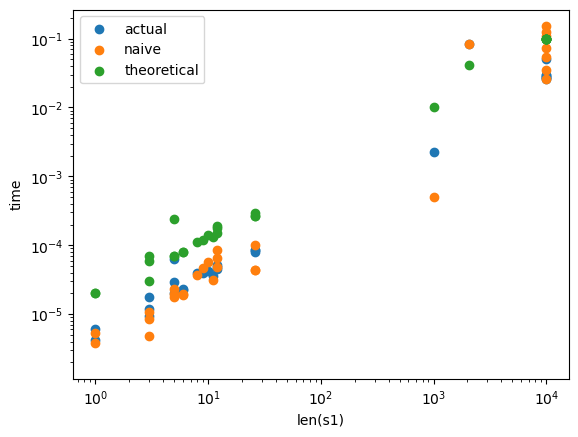

In [44]:
### DO: Plot its time complexity. 
### Compare against both the naive hashing scheme and the theoretical complexity.  
import time
test_cases = [
        # (text, pattern, expected_indices)
        ("abcde", "bc", [1]),
        ("aaaaa", "aa", [0, 1, 2, 3]),
        ("abcdef", "gh", []),
        ("abcabcabc", "abc", [0, 3, 6]),
        ("abababab", "aba", [0, 2, 4]),
        ("a", "a", [0]),
        ("a", "b", []),
        ("", "", [0]),  # edge: empty pattern in empty string
        ("abc", "", [0,1,2,3]),  # edge: empty pattern in non-empty string
        ("", "a", []),  # edge: empty text, non-empty pattern
        ("abc", "abc", [0]),
        ("abc", "abcd", []),
        ("zzzzzz", "zz", [0,1,2,3,4]),
        ("abcdefghijklmnopqrstuvwxyz", "z", [25]),
        ("abcdefghijklmnopqrstuvwxyz", "a", [0]),
        ("abcdefghijklmnopqrstuvwxyz", "mno", [12]),
        ("ababababab", "baba", [1,3,5]),
        ("abcabcabcabc", "cab", [2,5,8]),
        ("abcabcabcabc", "abcabc", [0,3,6]),
        ("abcabcabcabc", "abcabcd", []),
        ("aaaaabaaaaa", "ab", [4]),
        ("a" * 10000, "a" * 10, list(range(0, 10000 - 10 + 1))),
        ("x" * 5000 + "pattern" + "y" * 5000, "pattern", [5000]),
        ("z" * 10000, "abc", []),
        ("b" * 9990 + "endingpattern", "endingpattern", [9990]),
        ("startpattern" + "c" * 9990, "startpattern", [0]),
        ("ab" * 5000, "ab", list(range(0, 10000, 2))),
        ("loremipsum" * 1000, "ipsum", [5 + 10 * i for i in range(1000)]),
        ("x" * 2048, "x" * 2048, [0]),
        ("short", "thispatternislonger", []),
        ("a" * 1000, "", list(range(1001))),
    ]
time_elapsed = []
naive_time = []
s1 = []
s2 = []
for index, (text, pattern, expected) in enumerate(test_cases):
        start = time.perf_counter()
        result = RK(text, pattern)
        end = time.perf_counter()
        time_elapsed.append(end-start)
        start = time.perf_counter()
        result = naive(text, pattern)
        end = time.perf_counter()
        naive_time.append(end-start)
        s1.append(len(text))
        s2.append(len(pattern))

plt.scatter(s1, time_elapsed, label = "actual")
plt.scatter(s1, naive_time, label = "naive")
#Note: since time is variable, what is important for theoretical is the pattern and not the actual value as the actual O() function is unknown
plt.scatter(s1, [(s1[i] + s2[i])/100000 for i in range(len(s1))], label = "theoretical")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("len(s1)")
plt.ylabel("time")

plt.show()
